<a href="https://colab.research.google.com/github/hide-squid/high-school-project-1/blob/main/%EC%9E%A5%EB%A5%B4_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/kaggle.json

#permission warning 방지
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d andradaolteanu/gtzan-dataset-music-genre-classification
!unzip -q gtzan-dataset-music-genre-classification.zip

Saving kaggle.json to kaggle (1).json
 99% 1.20G/1.21G [00:15<00:00, 104MB/s]
100% 1.21G/1.21G [00:15<00:00, 81.4MB/s]


In [ ]:
import pandas as pd

df = pd.read_csv('Data/features_3_sec.csv')

df.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [ ]:
from sklearn import preprocessing
X = df.drop(columns=['filename','length','label'])
y = df['label'] #장르명

scaler = sklearn.preprocessing.MinMaxScaler()
np_scaled = scaler.fit_transform(X)

X = pd.DataFrame(np_scaled, columns=X.columns)

X.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,0.355399,0.716757,0.293133,0.107955,0.262173,0.034784,0.459205,0.094130,0.346153,0.083164,...,0.363613,0.056198,0.397172,0.066062,0.371828,0.055344,0.380831,0.026797,0.506746,0.047781
1,0.367322,0.670347,0.253040,0.044447,0.270969,0.018716,0.470831,0.052261,0.363722,0.051694,...,0.468596,0.092912,0.351681,0.074001,0.362068,0.076365,0.418452,0.082414,0.593029,0.065548
2,0.373159,0.728067,0.296753,0.141663,0.265293,0.023073,0.494051,0.059922,0.378215,0.060820,...,0.479681,0.096704,0.420979,0.050639,0.400536,0.067509,0.433742,0.043841,0.546264,0.036062
3,0.399349,0.677066,0.298024,0.075042,0.238427,0.023187,0.455246,0.066234,0.329587,0.070906,...,0.386258,0.067995,0.387474,0.050617,0.380430,0.050030,0.405824,0.041898,0.562204,0.034873
4,0.355668,0.689113,0.322308,0.052149,0.233460,0.016451,0.451651,0.047830,0.318453,0.046916,...,0.438567,0.042500,0.460314,0.083860,0.388590,0.076524,0.409019,0.020763,0.517913,0.031713


In [ ]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train, y_test = train_test_split(X ,y , test_size=0.2, random_state=2021)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7992, 57) (7992,)
(1998, 57) (1998,)


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [ ]:
from xgboost import XGBClassifier #xgboost 모델이 좋다길래 ..!!
from sklearn.metrics import accuracy_score

xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05) #1000개의 가지? epoch? , 0.05 학습률
xgb.fit(X_train, y_train) #학습

y_pred = xgb.predict(X_test) #검증
y_pred = le.inverse_transform(y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

print('Accuracy: %.2f' % accuracy_score(y_test,y_preds))

[[177   1   3   5   2   2   1   0   0   3]
 [  1 183   2   0   0   6   0   0   0   1]
 [ 10   1 171   1   1   7   0   1   4   2]
 [  0   0   2 196   2   0   1   3   2   8]
 [  2   0   3   3 185   4   2   7   5   0]
 [  6   6   1   1   0 176   0   2   0   0]
 [  0   1   0   1   1   0 191   0   0   7]
 [  0   0   7   7   1   1   0 197   1   3]
 [  5   0   6   2   1   3   1   1 178   2]
 [  2   2   8   5   0   2   4   2   1 153]]
Accuracy: 0.00


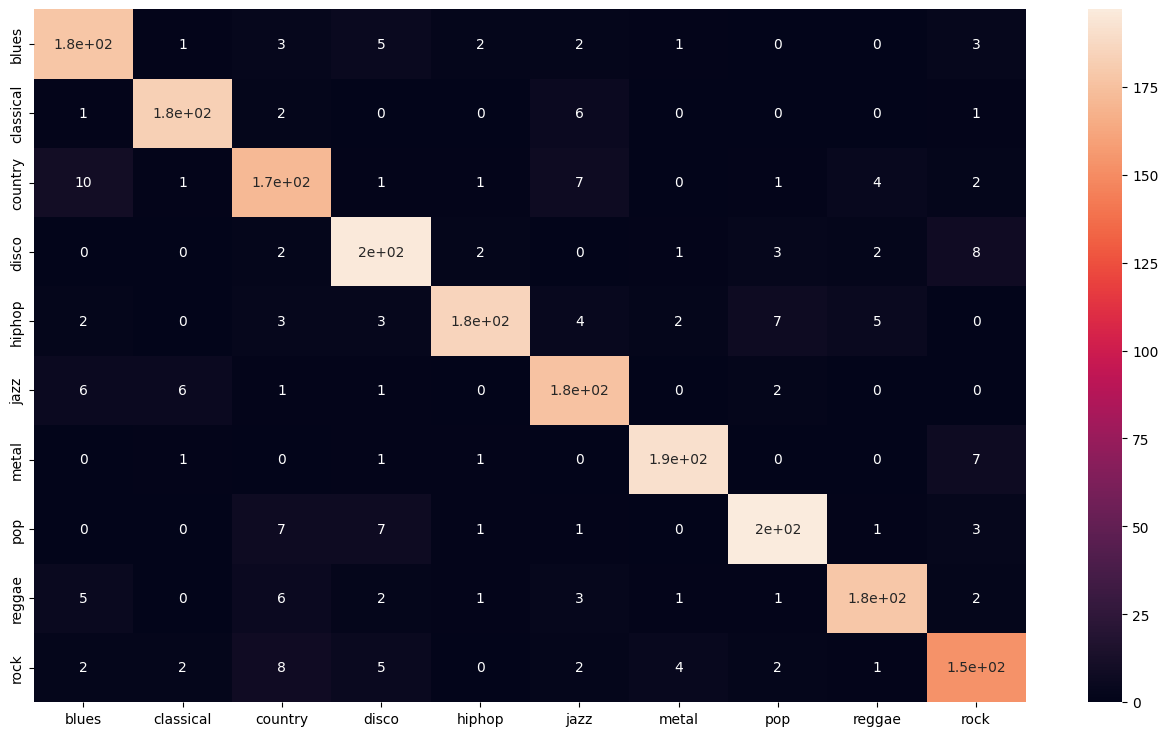

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(16,9))
sns.heatmap(
    cm,
    annot=True,
    xticklabels=["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"],
    yticklabels=["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]
)
plt.show()

In [ ]:
for feature, importance in zip(X_test.columns, xgb.feature_importances_):
    print('%s: %.2f' % (feature, importance))

chroma_stft_mean: 0.04
chroma_stft_var: 0.03
rms_mean: 0.02
rms_var: 0.03
spectral_centroid_mean: 0.01
spectral_centroid_var: 0.02
spectral_bandwidth_mean: 0.06
spectral_bandwidth_var: 0.01
rolloff_mean: 0.02
rolloff_var: 0.03
zero_crossing_rate_mean: 0.02
zero_crossing_rate_var: 0.01
harmony_mean: 0.02
harmony_var: 0.02
perceptr_mean: 0.02
perceptr_var: 0.08
tempo: 0.02
mfcc1_mean: 0.02
mfcc1_var: 0.03
mfcc2_mean: 0.01
mfcc2_var: 0.01
mfcc3_mean: 0.02
mfcc3_var: 0.02
mfcc4_mean: 0.04
mfcc4_var: 0.01
mfcc5_mean: 0.01
mfcc5_var: 0.02
mfcc6_mean: 0.02
mfcc6_var: 0.01
mfcc7_mean: 0.01
mfcc7_var: 0.02
mfcc8_mean: 0.01
mfcc8_var: 0.01
mfcc9_mean: 0.02
mfcc9_var: 0.01
mfcc10_mean: 0.01
mfcc10_var: 0.01
mfcc11_mean: 0.01
mfcc11_var: 0.01
mfcc12_mean: 0.02
mfcc12_var: 0.01
mfcc13_mean: 0.01
mfcc13_var: 0.01
mfcc14_mean: 0.01
mfcc14_var: 0.01
mfcc15_mean: 0.01
mfcc15_var: 0.01
mfcc16_mean: 0.01
mfcc16_var: 0.01
mfcc17_mean: 0.01
mfcc17_var: 0.01
mfcc18_mean: 0.01
mfcc18_var: 0.01
mfcc19_mean: 0

In [ ]:
df_30 = pd.read_csv('Data/features_30_sec.csv', index_col='filename')

labels = df_30[['label']]
df_30 = df_30.drop(columns=['length','label'])

df_30_scaled = sklearn.preprocessing.scale(df_30)  #평균 0 , 표준편차 1

df_30 = pd.DataFrame(df_30_scaled, columns=df_30.columns)

df_30.head()

,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var
0,-0.350137,0.312587,-0.010690,-0.061856,-0.583585,-0.848311,-0.456402,-0.531042,-0.486473,-0.661934,...,-0.086396,-0.246114,0.500462,-0.780265,-0.237040,-0.643177,0.006723,-0.300597,0.604064,-0.512988
1,-0.462482,1.117572,-0.532852,-0.186821,-0.938516,-0.234194,-0.386852,0.796252,-0.648681,0.795823,...,-0.048102,-0.159175,0.711371,-0.069304,-0.054982,-0.453456,0.544806,-0.407087,0.424127,-0.538421
2,-0.184225,-0.137701,0.679978,-0.084093,-0.906885,-0.781694,-0.940663,-0.630916,-0.971592,-0.744406,...,0.284825,-0.596243,-0.827516,-0.448091,-0.600983,-0.329519,-0.295934,-0.527297,-0.296189,-0.874954
3,0.319639,0.990659,0.154810,0.907029,-1.581429,-0.712095,-1.228256,0.304565,-1.516390,-0.246530,...,-0.080249,-0.482843,0.142153,-0.371370,0.033427,-0.767591,0.455409,-0.779744,-0.602881,-0.844508
4,-0.859077,0.194163,-0.600165,-0.205909,-0.512542,-0.315178,-0.939770,-0.504463,-0.630107,-0.190517,...,-1.238616,0.751318,-0.327220,0.377620,-0.368375,-0.293696,-0.553016,-0.089383,-2.766009,-0.330287


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
similarity = cosine_similarity(df_30)   #벡터의 유사도 , 즉 벡터간의 각도를 통해 추정 cos0 =1 이므로 1에 가까울 수록 유사 / cos180 = -1 이므로 -1에 가까울 수록 다르다.

sim_df = pd.DataFrame(similarity, index=labels.index, columns=labels.index)

sim_df.head()

filename,blues.00000.wav,blues.00001.wav,blues.00002.wav,blues.00003.wav,blues.00004.wav,blues.00005.wav,blues.00006.wav,blues.00007.wav,blues.00008.wav,blues.00009.wav,...,rock.00090.wav,rock.00091.wav,rock.00092.wav,rock.00093.wav,rock.00094.wav,rock.00095.wav,rock.00096.wav,rock.00097.wav,rock.00098.wav,rock.00099.wav
filename,,,,,,,,,,,,,,,,,,,,,
blues.00000.wav,1.000000,0.049231,0.589618,0.284862,0.025561,-0.346688,-0.219483,-0.167626,0.641877,-0.097889,...,-0.082829,0.546169,0.578558,0.662590,0.571629,0.610942,0.640835,0.496294,0.284958,0.304098
blues.00001.wav,0.049231,1.000000,-0.096834,0.520903,0.080749,0.307856,0.318286,0.415258,0.120649,0.404168,...,-0.098111,-0.325126,-0.370792,-0.191698,-0.330834,-0.077301,-0.222119,-0.302573,0.499562,0.311723
blues.00002.wav,0.589618,-0.096834,1.000000,0.210411,0.400266,-0.082019,-0.028061,0.104446,0.468113,-0.132532,...,-0.032408,0.561074,0.590779,0.583293,0.514537,0.495707,0.566837,0.589983,0.216378,0.321069
blues.00003.wav,0.284862,0.520903,0.210411,1.000000,0.126437,0.134796,0.300746,0.324566,0.352758,0.295184,...,-0.320107,-0.206516,-0.151132,0.041986,-0.172515,-0.000287,0.020515,-0.107821,0.502279,0.183210
blues.00004.wav,0.025561,0.080749,0.400266,0.126437,1.000000,0.556066,0.482195,0.623455,0.029703,0.471657,...,0.087605,0.017366,0.138035,0.104684,-0.034594,0.063454,0.063546,0.172944,0.153192,0.061785


In [ ]:
def find_similar_songs(name, n=5):
  series = sim_df[name].sort_values(ascending=False)

  series = series.drop(name)

  return series.head(n).to_frame()

find_similar_songs('rock.00000.wav')

,rock.00000.wav
filename,
rock.00079.wav,0.681819
rock.00026.wav,0.677842
country.00070.wav,0.675324
rock.00064.wav,0.662020
rock.00096.wav,0.654814
